# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm, datasets
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
le=LabelEncoder()
encoder = preprocessing.LabelEncoder()
svc = svm.SVC()

In [2]:
data = pd.read_csv("../Data/facial_image_ar.csv", sep = ';')

In [3]:
features = data.iloc[:,1:3].values
label= data.iloc[:,3].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.40,random_state=1)

#print
print(X_train.shape)
print(X_test.shape)

# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


print("Accuracy:",metrics.accuracy_score(y_test, Y_pred_label))

(148, 2)
(99, 2)
Accuracy: 0.3939393939393939


In [5]:
y=label
y = encoder.fit_transform(y)
scaler.fit(features)
X = scaler.transform(features)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.38666666666666666


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,label, test_size=0.4,random_state=1)
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.3939393939393939


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,label, test_size=0.5,random_state=1)
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.3951612903225806


In [8]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc,X,label, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [9]:
print(scores.mean())

0.3805


In [10]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X,label, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [11]:
print(scores.mean())

0.3805


In [12]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X,label,  cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [13]:
print(scores.mean())

0.3805


In [14]:

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X,y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  


[0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805]


Text(0, 0.5, 'Cross-Validated Accuracy')

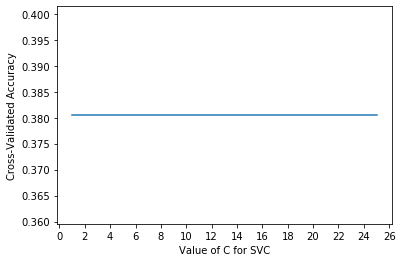

In [15]:

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805]


Text(0, 0.5, 'Cross-Validated Accuracy')

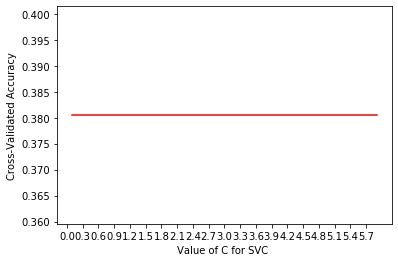

In [17]:

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score,color='r')
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')